In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats
import matplotlib.pyplot as plt
import matplotlib as mpl


import utils
import seaborn as sns 
import plotnine as pn
from sklearn.preprocessing import StandardScaler, scale
import torch


In [ ]:
import importlib
importlib.reload(utils)


In [17]:
subj = utils.ExpInfo.getSubjIDs()[0]
task = utils.ExpInfo.taskName[0]

In [18]:
df_all = utils.LoadData.behaviorData(subj, task)

In [19]:
x, h, y = utils.LoadData.xhy(subj, task)

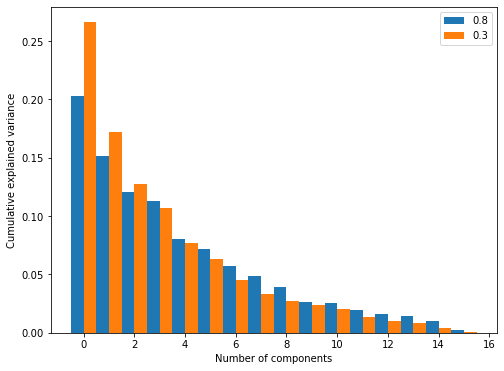

In [31]:
pca = utils.Analysis.pca(h[1])
n = len(pca.explained_variance_ratio_)
p1 = pca.explained_variance_ratio_

pca = utils.Analysis.pca(h[4])
p2 = pca.explained_variance_ratio_

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
# ax.bar(range(n), np.array([p1, p2]))
ax.bar(np.arange(n)-0.25, p1, label='0.8', width = 0.5)
ax.bar(np.arange(n)+0.25, p2, label='0.3', width = 0.5)

# pca = utils.Analysis.pca(h[4])
# n = len(pca.explained_variance_ratio_)
# ax.bar(range(n), pca.explained_variance_ratio_)


ax.set_xlabel('Number of components')
ax.set_ylabel('Cumulative explained variance')
ax.legend()

# ax.set_ylim([0, 1])


(0.0, 1.0)

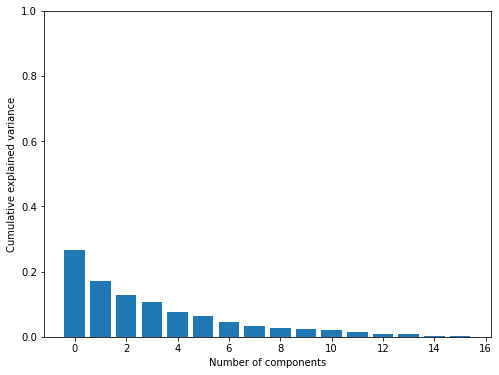

In [21]:
pca = utils.Analysis.pca(h[4])
n = len(pca.explained_variance_ratio_)
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.bar(range(n), pca.explained_variance_ratio_)
ax.set_xlabel('Number of components')
ax.set_ylabel('Cumulative explained variance')
ax.set_ylim([0, 1])


(0.0, 1.0)

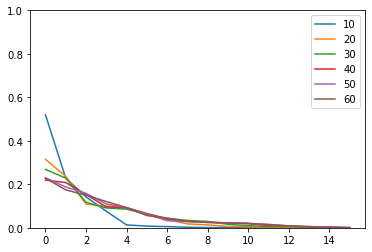

In [7]:
trialno = 54
df = utils.LoadData.mouseMovement(subj, task, trialno+1)

evrs = []
wSizes = range(10, 61, 10)
for wSize in wSizes:
    x = utils.DataProcessing.rollingWindow_from_df(df, wSize, 1)
    x = torch.from_numpy(x)
    y = model.forward(x)
    h = model.model.x_hidden
    h = h.detach().numpy()
    pca = utils.Analysis.pca(h)
    evr = pca.explained_variance_ratio_
    evrs.append(evr)

plt.plot(np.vstack(evrs).T)
plt.legend(wSizes)
plt.ylim([0, 1])